<a href="https://colab.research.google.com/github/raspberryscorn/2_5_2/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2_5_2 "AI는 꽃을 구분할 수 있을까?"


In [ ]:
cd "/content/drive/MyDrive/ddeep/bhban_ai/SECTION_2/Chapter_5/2_5_2"

/content/drive/MyDrive/ddeep/bhban_ai/SECTION_2/Chapter_5/2_5_2


Reading Data...


Data Read Done!
Training X Size : (120, 4)
Training Y Size : (120,)
Test X Size : (30, 4)
Test Y Size : (30,)




************ TRAINING START ************ 
Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.3837 - loss: 1.1028 - val_accuracy: 0.7333 - val_loss: 1.0117
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5716 - loss: 1.0185 - val_accuracy: 0.7000 - val_loss: 0.9441
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6746 - loss: 0.9270 - val_accuracy: 0.8667 - val_loss: 0.8725
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6270 - loss: 0.8903 - val_accuracy: 0.8000 - val_loss: 0.7919
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7047 - loss: 0.8075 - val_accuracy: 0.9000 - val_loss: 0.7138
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7664 - loss: 0.7169 - val_accuracy: 0.7333 - val_loss: 0.6378
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8053 

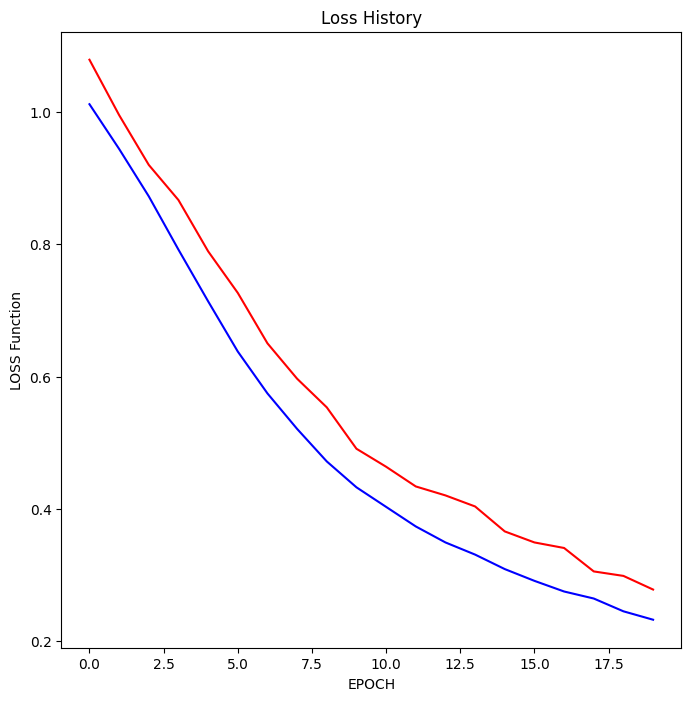

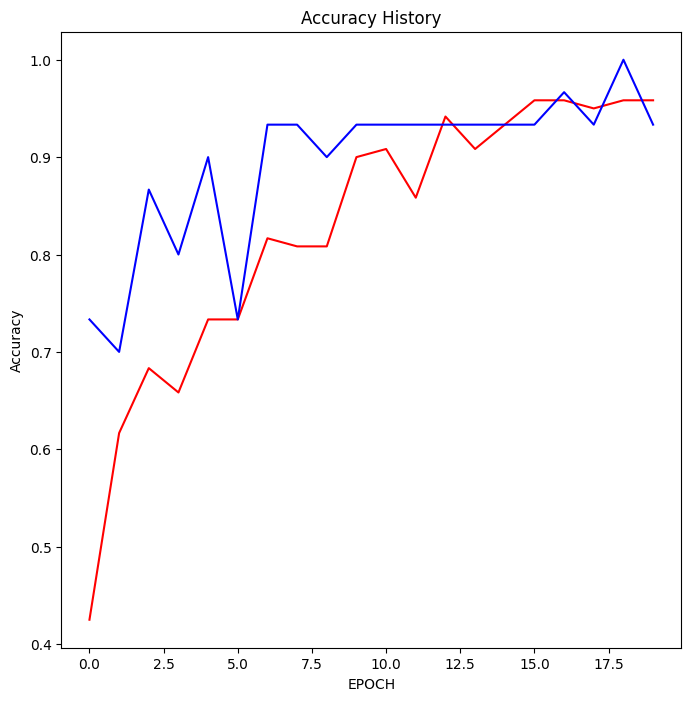

In [ ]:
from tensorflow import keras
import data_reader

# 몇 에포크 만큼 학습을 시킬 것인지 결정합니다.
EPOCHS = 20  # 예제 기본값은 20입니다.

# 데이터를 읽어옵니다.
dr = data_reader.DataReader()

# 인공신경망을 제작합니다.
model = keras.Sequential([
    keras.layers.Dense(4),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(3, activation='softmax')
])

# 인공신경망을 컴파일합니다.
model.compile(optimizer="adam", metrics=["accuracy"],
              loss="sparse_categorical_crossentropy")

# 인공신경망을 학습시킵니다.
print("\n\n************ TRAINING START ************ ")
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(dr.train_X, dr.train_Y, epochs=EPOCHS, batch_size=5,
                    validation_data=(dr.test_X, dr.test_Y),
                    callbacks=[early_stop])

# 학습 결과를 그래프로 출력합니다.
data_reader.draw_graph(history)
